<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/Carbrand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from google.colab import files
uploaded = files.upload()

Saving brand.csv to brand (1).csv
Saving cars.csv to cars (1).csv


In [31]:
#데이터 불러오기
import pandas as pd
cars_df = pd.read_csv("cars.csv")
brand_df = pd.read_csv("brand.csv")

In [32]:
print(brand_df.info(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 900.0+ bytes
None


In [33]:
print(cars_df.head(20))

                title  Price  Mileage(miles)  Registration_Year  \
0         SKODA FABIA   6900           70189               2016   
1      VAUXHALL CORSA   1495           88585               2008   
2         HYUNDAI I30    949          137000               2011   
3          MINI HATCH   2395           96731               2010   
4      VAUXHALL CORSA   1000           85000               2013   
5       HYUNDAI COUPE    800          124196               2007   
6          FORD FOCUS    798          140599               2008   
7      VAUXHALL CORSA   1995           90000               2009   
8           VOLVO 740    750          225318               2025   
9         PEUGEOT 207   1299           87000               2008   
10        FORD FIESTA   1495          181693               2009   
11  VAUXHALL INSIGNIA   2950           79000               2011   
12        SKODA FABIA   6900           70189               2016   
13       BMW 3 SERIES  19800           69690               201

1. cars_df의 'title'변수에서 브랜드 이름 추출

In [34]:
#데이터 합치기 (join)
cars_df['title'] = cars_df['title'].str.upper()
#title의 첫 번째 단어를 브랜드로 간주. 대소문자 통일

cars_df['Brand'] = cars_df['title'].apply(lambda x: x.split()[0])


2.brand_df의 'title' 컬럼 이름을 'Brand'로 변경하고 대소문자 통일

In [35]:
brand_df.columns = ['Brand', 'country']
brand_df['Brand'] = brand_df['Brand'].str.upper()

3. 두 데이터 프레임 합치기

In [36]:
merged_df = pd.merge(cars_df, brand_df, on='Brand', how='left')
print(merged_df[['title', 'Brand', 'country']].head())

            title     Brand         country
0     SKODA FABIA     SKODA  Czech Republic
1  VAUXHALL CORSA  VAUXHALL  United Kingdom
2     HYUNDAI I30   HYUNDAI     South Korea
3      MINI HATCH      MINI  United Kingdom
4  VAUXHALL CORSA  VAUXHALL  United Kingdom


**<결측치 처리>**

In [37]:
#변수별 결측치 개수 확인
print(merged_df.isnull().sum())

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
Brand                   0
country                 0
dtype: int64


In [38]:
print((merged_df.isnull().mean() * 100).round(2))
#결측치 비율 확인

title                 0.00
Price                 0.00
Mileage(miles)        0.00
Registration_Year     0.00
Previous Owners      38.27
Fuel type             0.00
Body type             0.00
Engine                1.22
Gearbox               0.00
Doors                 0.68
Seats                 0.95
Emission Class        2.36
Service history      85.35
Brand                 0.00
country               0.00
dtype: float64


In [39]:
# 1. 'Service history' 변수의 결측치를 'Unknown'으로 채우기
merged_df['Service history'] = merged_df['Service history'].fillna('Unknown')

#2. 'Previous Owners ' 변수의 결측치를 중앙값으로 대체
merged_df['Previous Owners'].fillna(merged_df['Previous Owners'].median(), inplace=True)


/tmp/ipython-input-3587978769.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Previous Owners'].fillna(merged_df['Previous Owners'].median(), inplace=True)


In [40]:
# 3.4. 남은 낮은 비율의 결측치 처리 (Engine, Doors, Seats, Emission Class)
# Engine은 추출에 필요하므로 최빈값으로 채우기
for col in ['Engine', 'Doors', 'Seats', 'Emission Class']:
    if merged_df[col].isnull().sum() > 0:
        mode_val = merged_df[col].mode()[0]
        merged_df[col].fillna(mode_val, inplace=True)

# 3.5. country 결측치 제거 (브랜드가 매칭되지 않은 행 제거)
df_cleaned = merged_df.dropna(subset=['country']).copy()

/tmp/ipython-input-3270006401.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(mode_val, inplace=True)


In [41]:
print(df_cleaned.isnull().sum()) #잔여 결측치 처리완료 !

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
Brand                0
country              0
dtype: int64


<카테고리형 변수 숫자 형태로 변환>

In [42]:
# 1. Engine 컬럼에서 숫자(배기량)만 추출하여 새 변수로 생성
merged_df['Engine_Size'] = merged_df['Engine'].str.extract(r'(\d+\.\d+)').astype(float)
merged_df['Engine_Size'].fillna(merged_df['Engine_Size'].median(), inplace=True)
merged_df.drop('Engine', axis=1, inplace=True)

# 2. Emission Class를 숫자형 코드로 변환 (Euro 등급 → 숫자)
merged_df['Emission_Code'] = merged_df['Emission Class'].str.extract(r'(\d)').astype(float)
merged_df['Emission_Code'].fillna(0, inplace=True)
merged_df.drop('Emission Class', axis=1, inplace=True)

# 3. 범주형 변수들을 원-핫 인코딩 (One-Hot Encoding)
cat_cols = ['Fuel type', 'Body type', 'Gearbox', 'country', 'Service history']
merged_df = pd.get_dummies(merged_df, columns=cat_cols, drop_first=True)

# 4. 분석에 불필요한 문자열형 변수 제거
merged_df.drop(['title', 'Brand'], axis=1, inplace=True, errors='ignore')


/tmp/ipython-input-3232025722.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Engine_Size'].fillna(merged_df['Engine_Size'].median(), inplace=True)
/tmp/ipython-input-3232025722.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

<Scaler 활용 및 PCA (주성분 분석)>

In [43]:
#카테고리형 변수 숫자 형태로 변환

# 1. 'Engine'에서 'Engine_Size'추출 및 기존 컬럼 제거
df_cleaned['Engine_Size'] = df_cleaned['Engine'].str.extract(r'(\d+\.\d+)L').astype(float)
df_cleaned['Engine_Size'].fillna(df_cleaned['Engine_Size'].median(), inplace=True)
df_cleaned.drop('Engine', axis=1, inplace=True)

# 2. 'Emission Class'를 순서형 인코딩 및 강제 숫자 변환
emission_map = {
    'Euro 6': 6, 'Euro 5': 5, 'Euro 4': 4, 'Euro 3': 3, 'Euro 2': 2, 'Euro 1': 1,
    'Other': 0, 'Not Classified': 0
}
df_cleaned['Emission_Code'] = df_cleaned['Emission Class'].replace(emission_map)

# 오류 해결 코드: 변환되지 않은 문자열을 NaN으로 만들고 0으로 대체 !!!
df_cleaned['Emission_Code'] = pd.to_numeric(df_cleaned['Emission_Code'], errors='coerce')
df_cleaned['Emission_Code'].fillna(0, inplace=True)

df_cleaned.drop('Emission Class', axis=1, inplace=True)

# 3. 명목형 변수 One-Hot Encoding (pd.get_dummies, drop_first=True 적용)
categorical_cols = ['Fuel type', 'Body type', 'Gearbox', 'country', 'Service history']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# 4. 분석에 불필요한 문자열 변수 제거
df_final = df_encoded.drop(['title', 'Brand'], axis=1)


/tmp/ipython-input-3448675387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Engine_Size'].fillna(df_cleaned['Engine_Size'].median(), inplace=True)
/tmp/ipython-input-3448675387.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['Emission_Code'] = df_cleaned['Emission C

<주성분 분석>

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 1. 데이터 표준화 (StandardScaler): PCA를 위해
X = df_final.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("1.StandardScaler를 활용한 데이터 스케일링 완료.")

# 2. PCA (70% 분산 목표)
pca_full = PCA()
pca_full.fit(X_scaled)
cumulative_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

target_ratio = 0.70
# 70%를 넘는 최소 주성분 개수 찾기
n_components = np.where(cumulative_variance_ratio >= target_ratio)[0][0] + 1
target_variance = cumulative_variance_ratio[n_components - 1]

# 최소 주성분 개수로 데이터 변환
pca_final = PCA(n_components=n_components)
X_pca = pca_final.fit_transform(X_scaled)

print(f"2.PCA 결과 - 최소 주성분 개수: {n_components}개, 설명력: {target_variance:.2%}")

1.StandardScaler를 활용한 데이터 스케일링 완료.
2.PCA 결과 - 최소 주성분 개수: 17개, 설명력: 72.11%


국가별 총 브랜드 개수 (상위 5개)
country
Japan             11
United Kingdom     8
Germany            6
United States      5
France             4
Price                 1.0000
Registration_Year     0.7230
Emission_Code         0.6944
Doors                 0.1132
Engine_Size          -0.0227
Seats                -0.0275
Previous Owners      -0.4011
Mileage(miles)       -0.5004


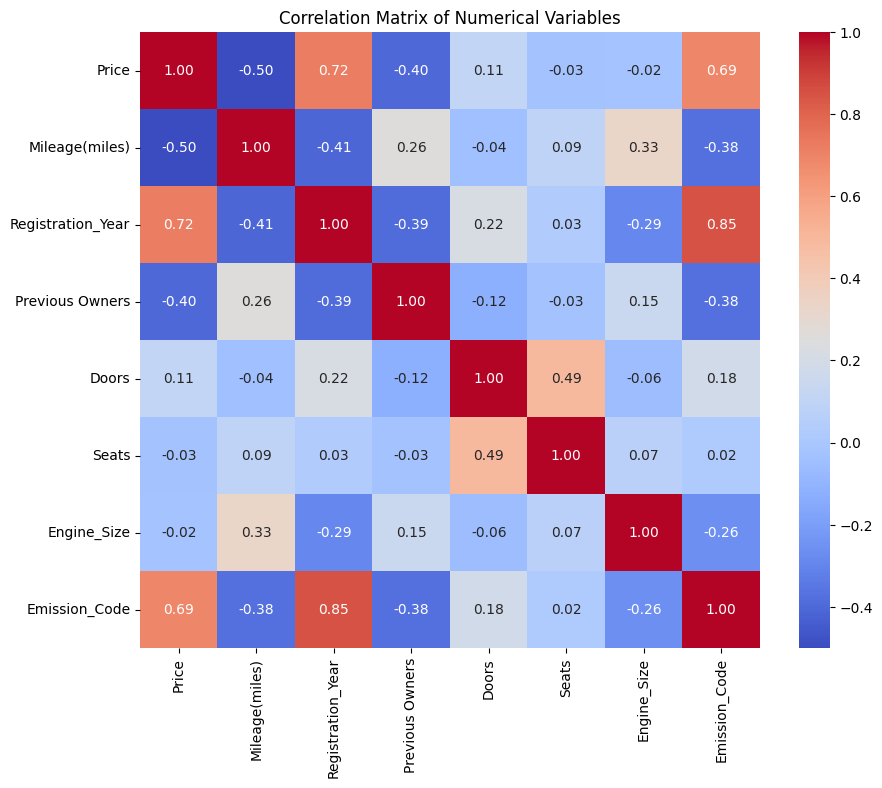

In [45]:
# 1. 국가별 총 브랜드 개수
country_brand_counts = brand_df.groupby('country')['Brand'].nunique().sort_values(ascending=False)
print("국가별 총 브랜드 개수 (상위 5개)")
print(country_brand_counts.head().to_string())

# 2. 'Price'와 상관관계가 높은 변수 확인
numeric_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats', 'Engine_Size', 'Emission_Code']
correlation_data = df_cleaned[numeric_cols].copy()
correlation_matrix = correlation_data.corr()
price_corr = correlation_matrix['Price'].sort_values(ascending=False)


print(price_corr.map(lambda x: f"{x:.4f}").to_string())

# 3. 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show() # 시각화 창